# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [1]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [2]:
def GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type):
  ## write code here for the Distance function here # 
    if Distance_Type=='Euclidiean':
        Cluster_Distance=[]
        for i in Data_points:
            for j in Cluster_Centroids:
                Cluster_Distance.append(np.linalg.norm(i-j))
        Cluster_distance=np.array(Cluster_Distance)
        Cluster_Distance=Cluster_distance.reshape(len(Data_points),len(Cluster_Centroids))
    return Cluster_Distance
                

In [3]:
Centroids=[[1,2],[7,8],[3,4]]
Points=np.array([[1,2],[3,4],[5,6],[7,8]])
x=GUC_Distance([[1,2],[7,8],[3,4]],np.array([[1,2],[3,4],[5,6],[7,8]]),'Euclidiean')
print(x)
x=list(x)
for i in x:
    i=list(i)
    print("Index of minimum value in every row is",i.index(min(i)))

[[0.         8.48528137 2.82842712]
 [2.82842712 5.65685425 0.        ]
 [5.65685425 2.82842712 2.82842712]
 [8.48528137 0.         5.65685425]]
Index of minimum value in every row is 0
Index of minimum value in every row is 2
Index of minimum value in every row is 1
Index of minimum value in every row is 1


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [29]:
def GUC_Kmean ( Data_points, Number_of_Clusters,  Distance_Type ):
    Cluster_metric_old=999999
    counter=0
    index=np.random.choice(len(Data_points),Number_of_Clusters,replace=False)
    Centroids=Data_points[index]
    while True:
        if counter==0:
            distance_array=GUC_Distance(Centroids,Data_points,'Euclidiean')
        else:    
            distance_array=GUC_Distance(updated_centroids,Data_points,'Euclidiean')
        
        distance_array=list(distance_array)
        #print(distance_array)
        indeces_array=[]
        Min_distance=[]
        for row in distance_array:
            Min_distance.append(min(row))
            row=list(row)
            indeces_array.append(row.index(min(row)))
        print("HIHI")
        Number_of_clusters=[]
        count=1
        indeces_array=np.array(indeces_array)
        indeces_array_unique=np.unique(indeces_array)
        for i in indeces_array_unique:
            Number_of_clusters.append(count)
            count+=1
        
        #Calculating Square Distance
        sum_arr=[]
        for i in range(len(Number_of_clusters)):
            sum=0
            for j in range(len(Data_points)):
                if indeces_array[j]==i:
                    sum=sum+pow(Min_distance[j],2)
            sum_arr.append(sum)
                
        Cluster_metric=np.sum(sum_arr)
        #Updating Centroids
        updated_centroids=[]
        for i in range(len(Number_of_clusters)):
            clusters_array=[]
            for j in range(len(Data_points)):
                if indeces_array[j]==i:
                    clusters_array.append(Data_points[j])
                    mean=np.mean(clusters_array,axis=0)
            updated_centroids.append(mean)
        counter+=1    
        if Cluster_metric_old-Cluster_metric <=0.000001:
            break
        else:
            Cluster_metric_old=Cluster_metric  
            
    return [ updated_centroids, indeces_array, Cluster_metric,counter]    

## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [44]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [4]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0,updated_centroids=[]):
    color = ['b','r','g','c','m','y','k','#00EEEE','#A9A9A9','#FF8C00','#682288']  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[np.where(np.array(km)==i)[0],0],X[np.where(np.array(km)==i)[0],1],c = color[i],alpha = alpha,s=s)
            plt.scatter(updated_centroids[i][0],updated_centroids[i][1],c = color[i], marker = 'x', s = 100)

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

3


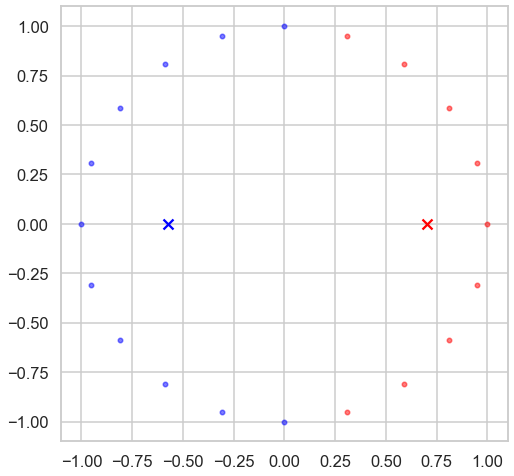

3


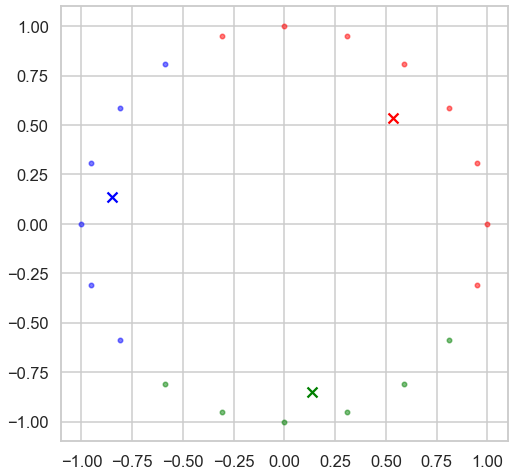

4


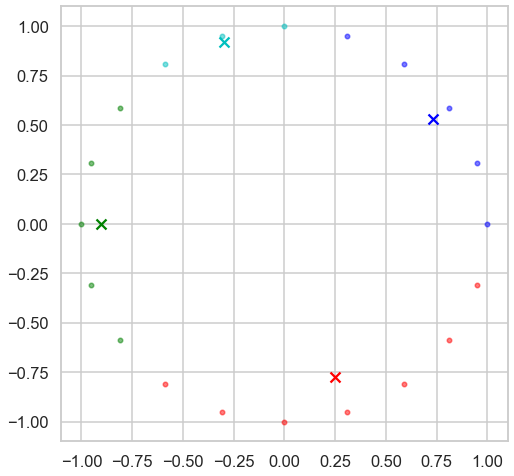

2


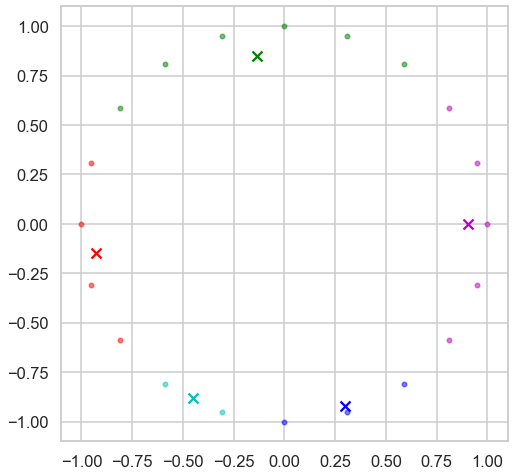

4


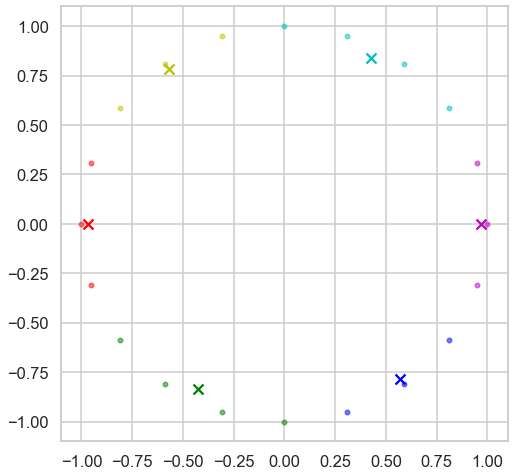

3


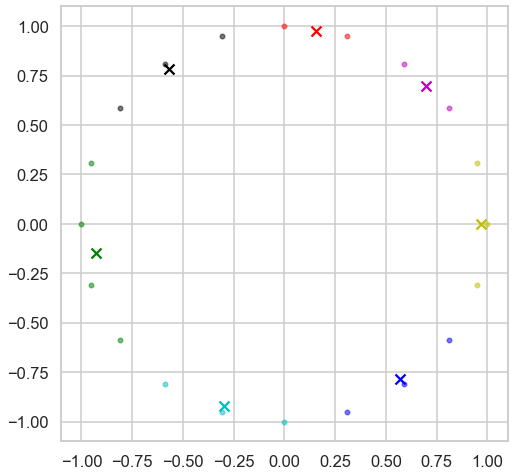

4


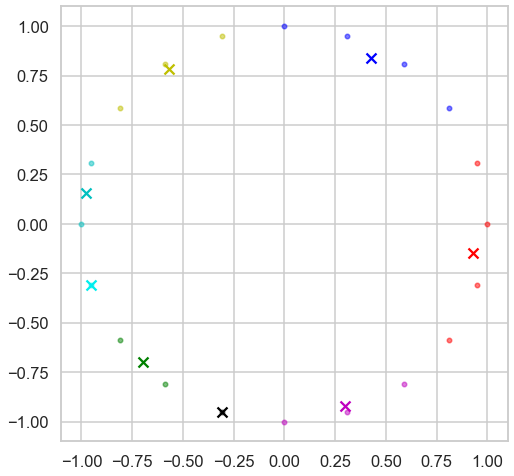

3


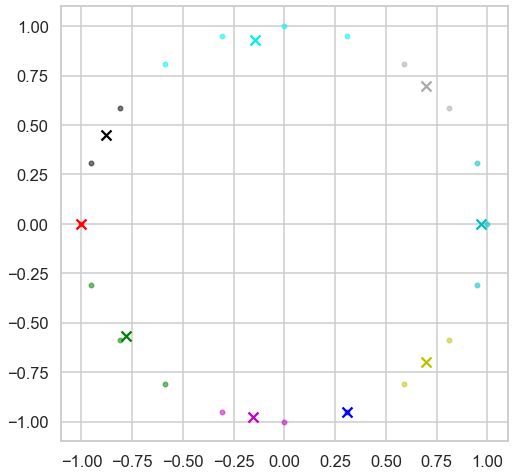

4


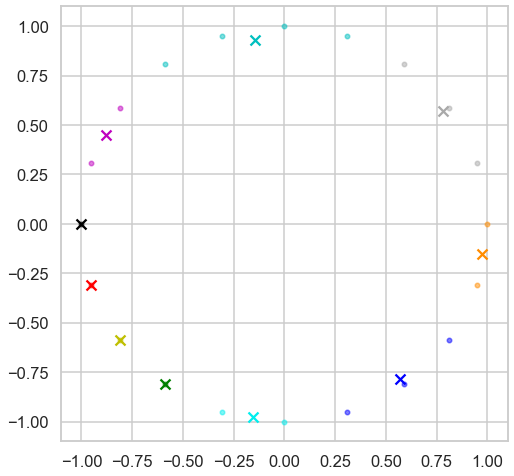

In [7]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 

i=2


while i<=10:
    [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,i,'Euclidiean')
    print(counter)
    # to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
    display_cluster(X,indeces_array,i,updated_centroids)
    plt.show()
    i+=1




> #### 2.3. Example 2 : Multi blob Data Gen and display 

18


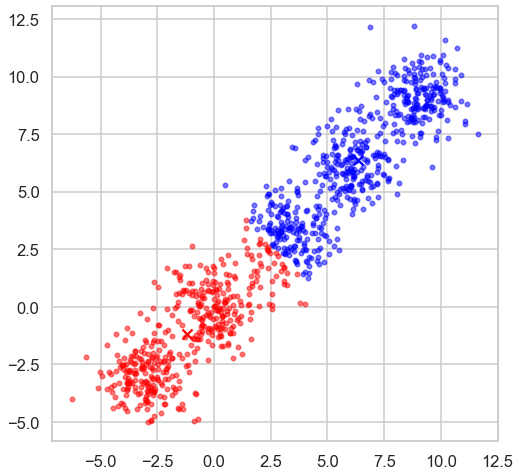

2


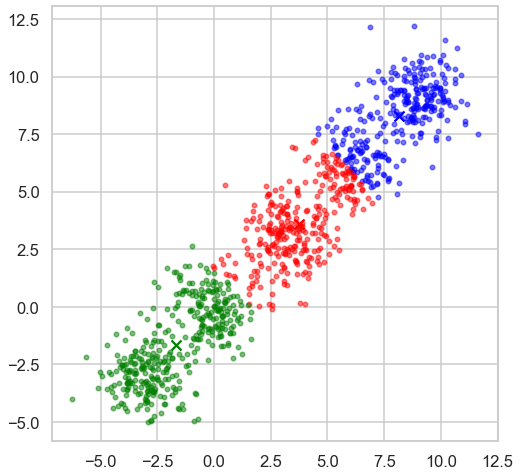

6


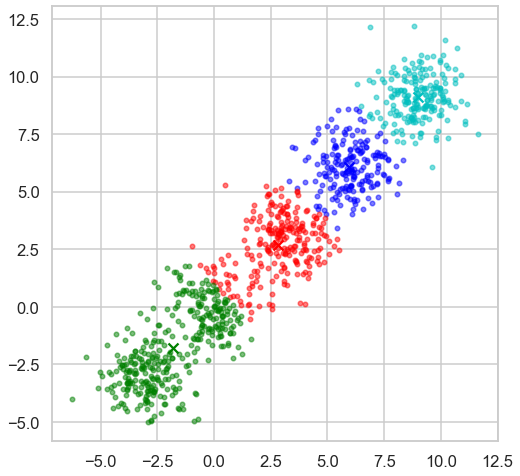

3


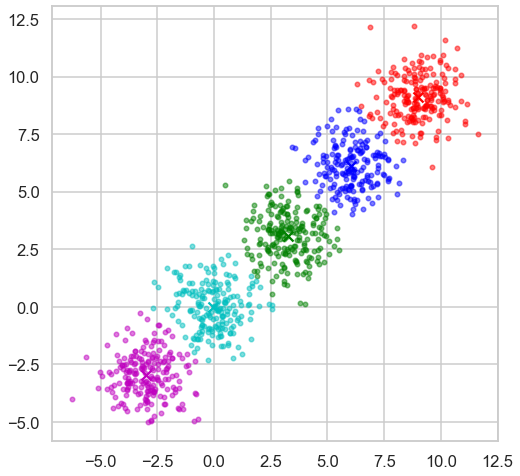

3


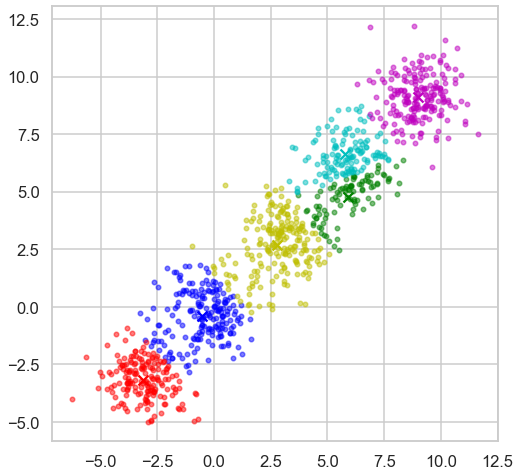

2


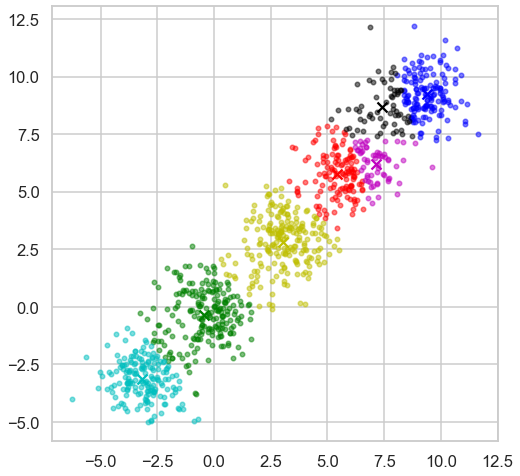

6


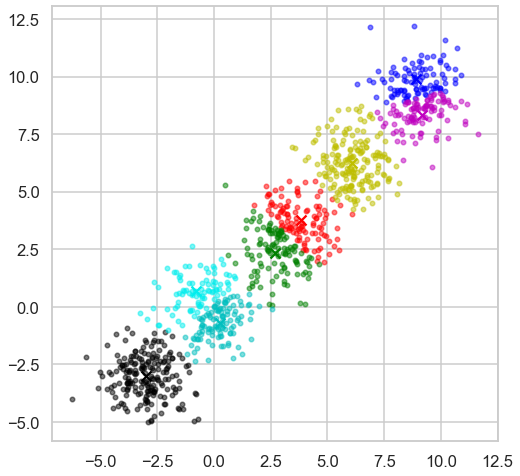

4


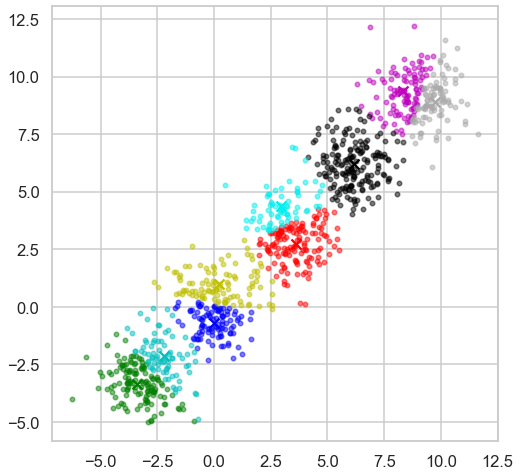

14


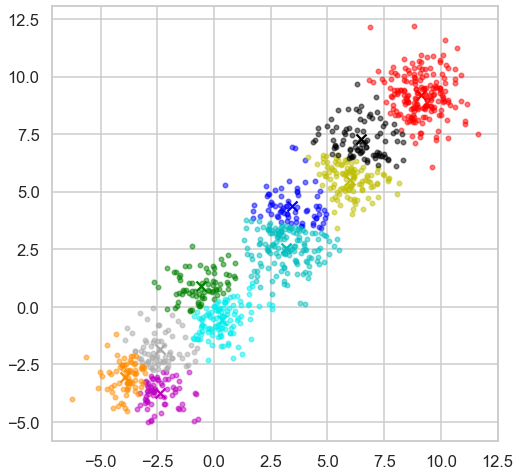

In [8]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                centers=centers, shuffle=False, random_state=42)
i=2
while i<=10:
    [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,i,'Euclidiean')
    print(counter)
    # to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
    display_cluster(X,indeces_array,i,updated_centroids)
    plt.show()
    i+=1

#### 2.3. Example 3 : moons Data Gen and display 

3


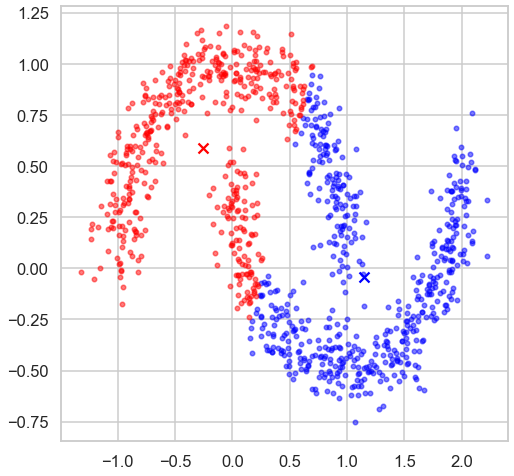

9


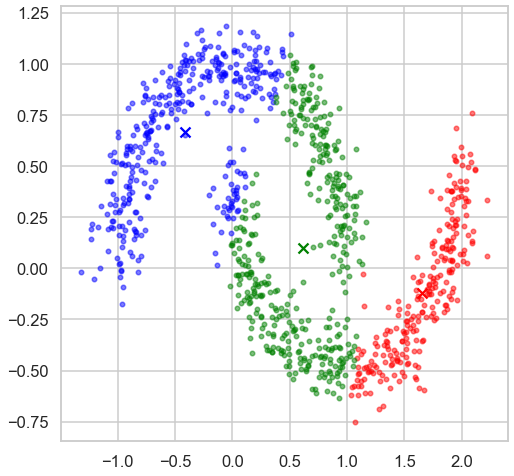

5


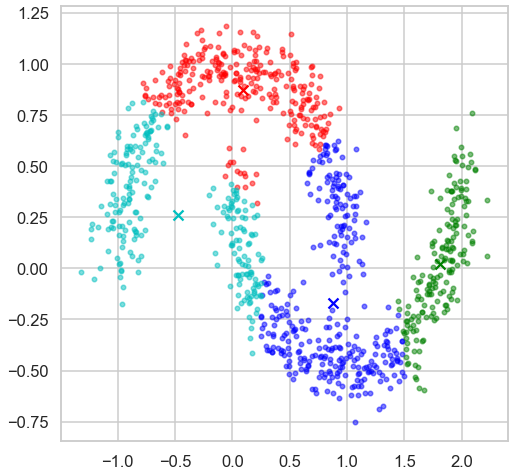

10


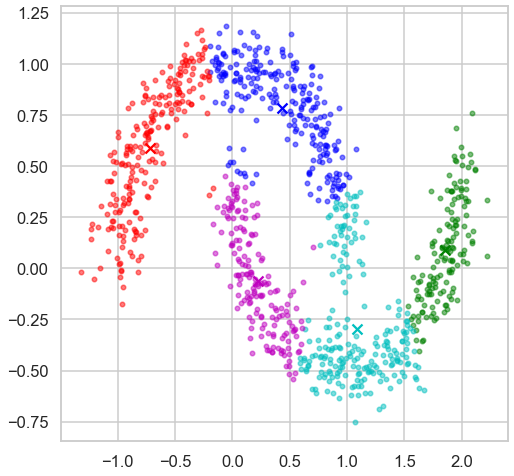

3


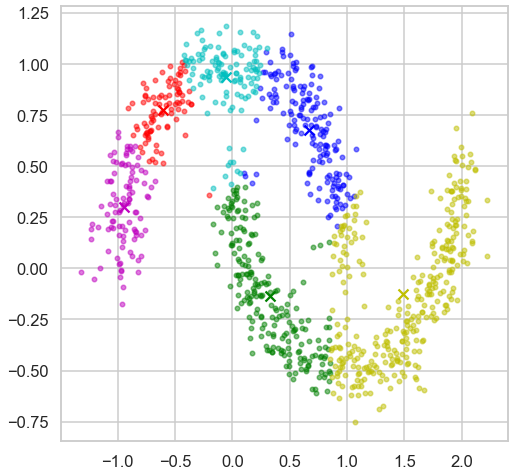

19


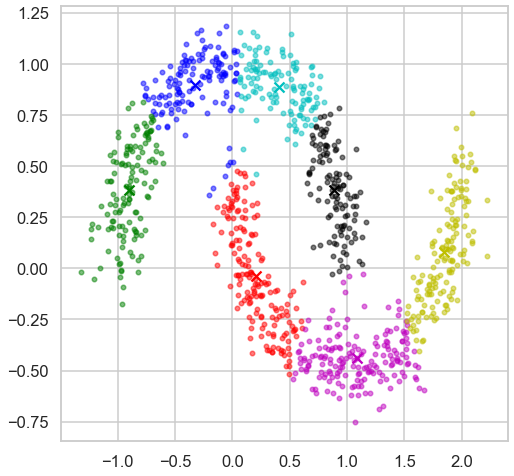

6


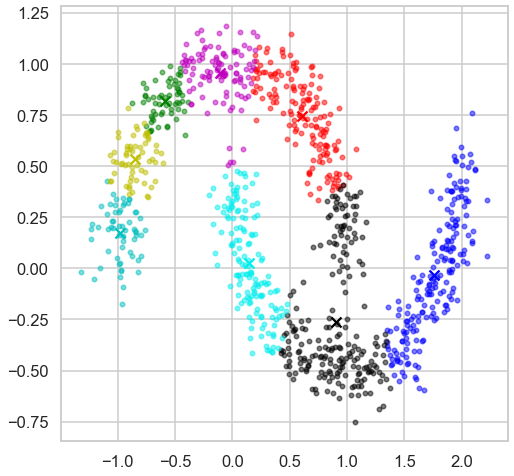

7


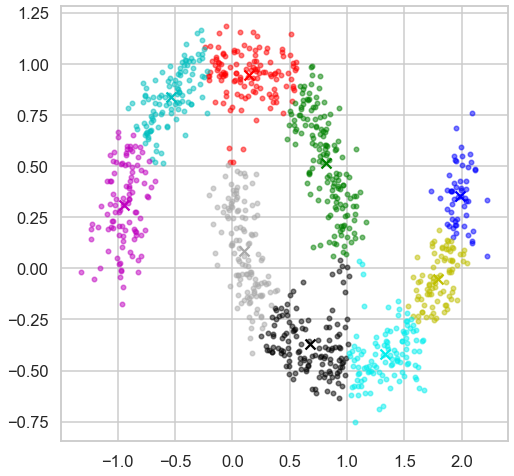

4


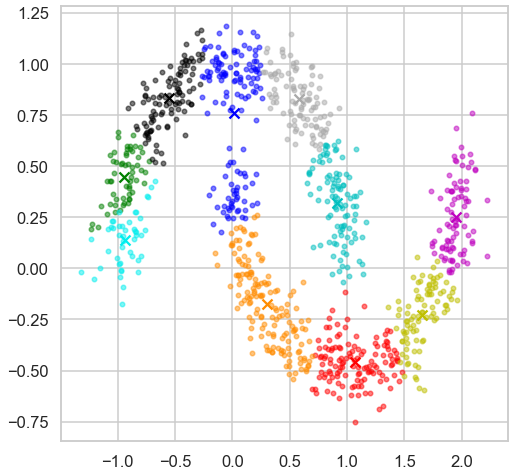

In [9]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
i=2
while i<=10:
    [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,i,'Euclidiean')
    print(counter)
    # to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
    display_cluster(X,indeces_array,i,updated_centroids)
    plt.show()
    i+=1

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

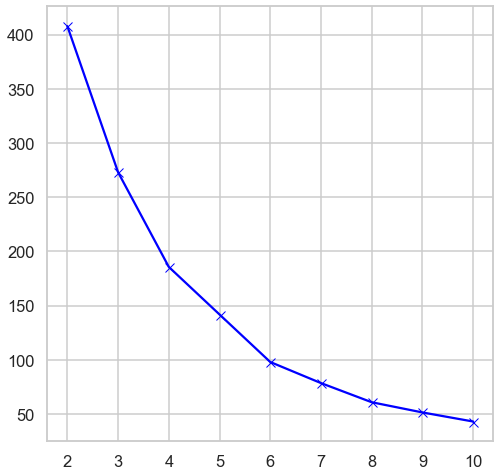

In [26]:
n_samples = 1000
X, y = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
j=2
distortion_cluster_min=[]
while j<=10:
    distortion_cluster=[]
    i=1
    while i<=50:
        [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,j,'Euclidiean')
        distortion_cluster.append(Cluster_metric)
        i+=1
    distortion_cluster_min.append(min(distortion_cluster))
    j+=1
z=[2,3,4,5,6,7,8,9,10]
#print(distortion_cluster_min)
plt.plot(z,distortion_cluster_min,'bx-')


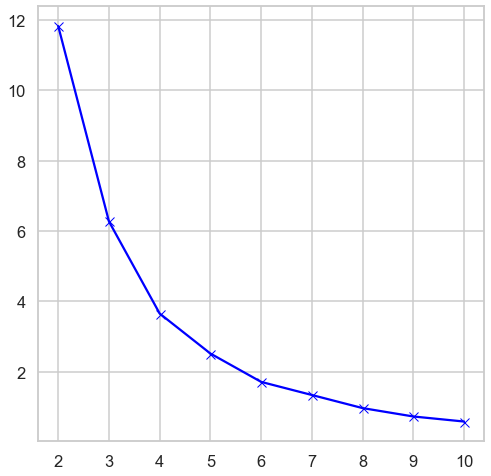

In [25]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,2,'Euclidiean')
# Cluster_metric
j=2
distortion_cluster_min=[]
while j<=10:
    distortion_cluster=[]
    i=1
    while i<=50:
        [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,j,'Euclidiean')
        distortion_cluster.append(Cluster_metric)
        i+=1
    distortion_cluster_min.append(min(distortion_cluster))
    j+=1
z=[2,3,4,5,6,7,8,9,10]
#print(distortion_cluster_min)
plt.plot(z,distortion_cluster_min,'bx-');

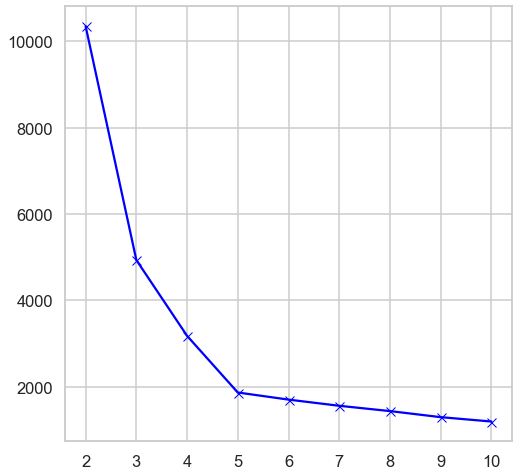

In [33]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X, y = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                centers=centers, shuffle=False, random_state=42)
j=2
distortion_cluster_min=[]
while j<=10:
    distortion_cluster=[]
    i=1
    while i<=50:
        [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,j,'Euclidiean')
        distortion_cluster.append(Cluster_metric)
        i+=1
    distortion_cluster_min.append(min(distortion_cluster))
    j+=1
z=[2,3,4,5,6,7,8,9,10]
#print(distortion_cluster_min)
plt.plot(z,distortion_cluster_min,'bx-');

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [167]:
dataset=pd.read_csv('Customer data.csv',usecols=['Age','Income'])

In [171]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler()
dataset['Income']=min_max_scaler.fit_transform(dataset[['Income']])
dataset.head()

,Age,Income
0,67,0.324781
1,22,0.420210
2,49,0.195144
3,45,0.496223
4,53,0.413842


In [172]:
X=dataset.values

[[67.          0.32478101]
 [22.          0.42021043]
 [49.          0.19514353]
 ...
 [31.          0.18487051]
 [24.          0.22716172]
 [25.          0.11912317]]


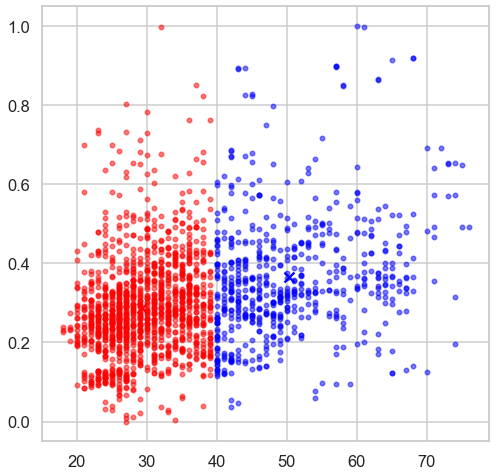

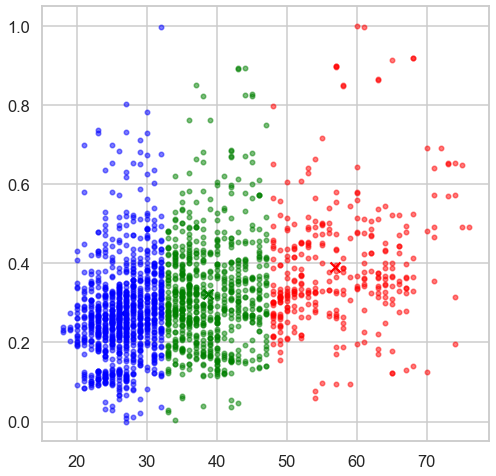

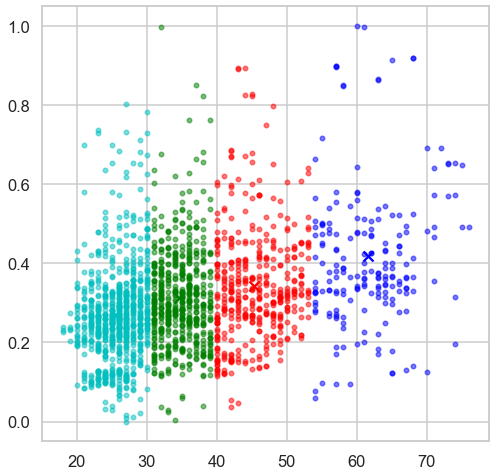

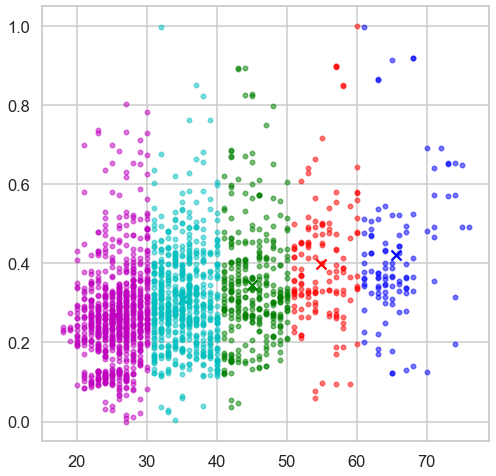

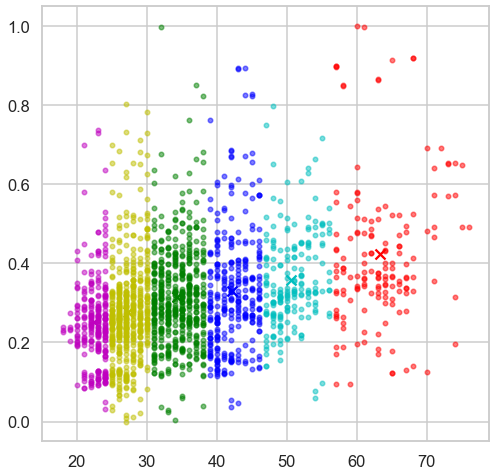

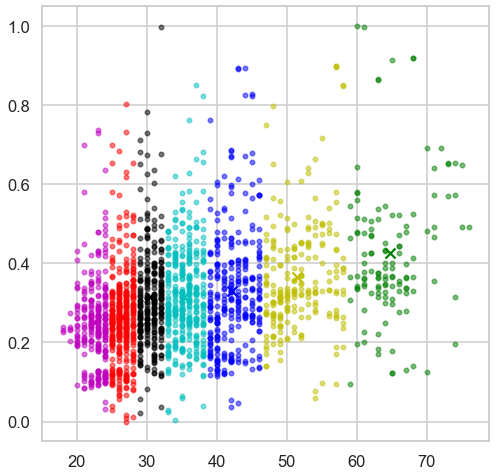

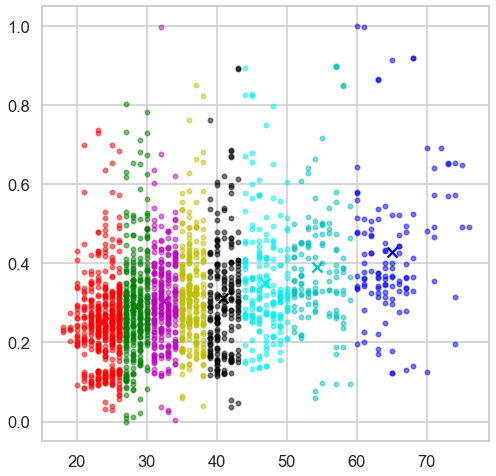

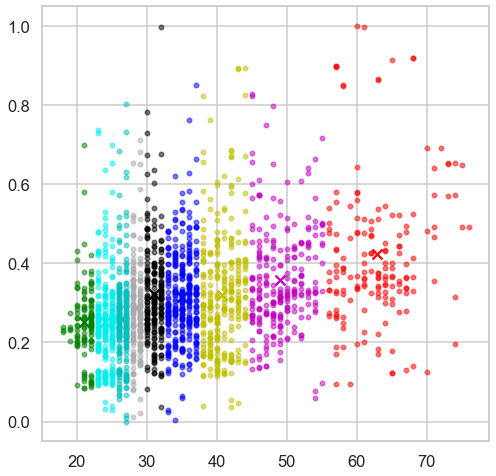

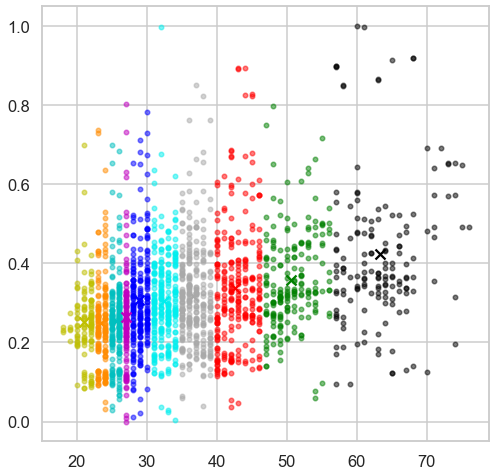

In [174]:
k=2
while k<=10:
    [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,k,'Euclidiean')
    plt.figure()
    display_cluster(X,indeces_array,k,updated_centroids)
    k=k+1


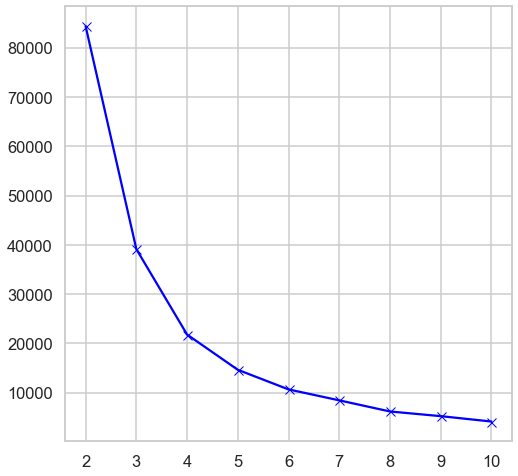

In [176]:
#Plotting elbow curve
j=2
distortion_cluster_min=[]
while j<=10:
    distortion_cluster=[]
    i=1
    while i<=30:
        [updated_centroids,indeces_array,Cluster_metric,counter]=GUC_Kmean(X,j,'Euclidiean')
        distortion_cluster.append(Cluster_metric)
        i+=1
    distortion_cluster_min.append(min(distortion_cluster))
    j+=1
z=[2,3,4,5,6,7,8,9,10]
plt.plot(z,distortion_cluster_min,'bx-')
